In [80]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']= [16,9]
plt.rcParams['figure.dpi']= 250

98.69997216099068
0.9969694157675827


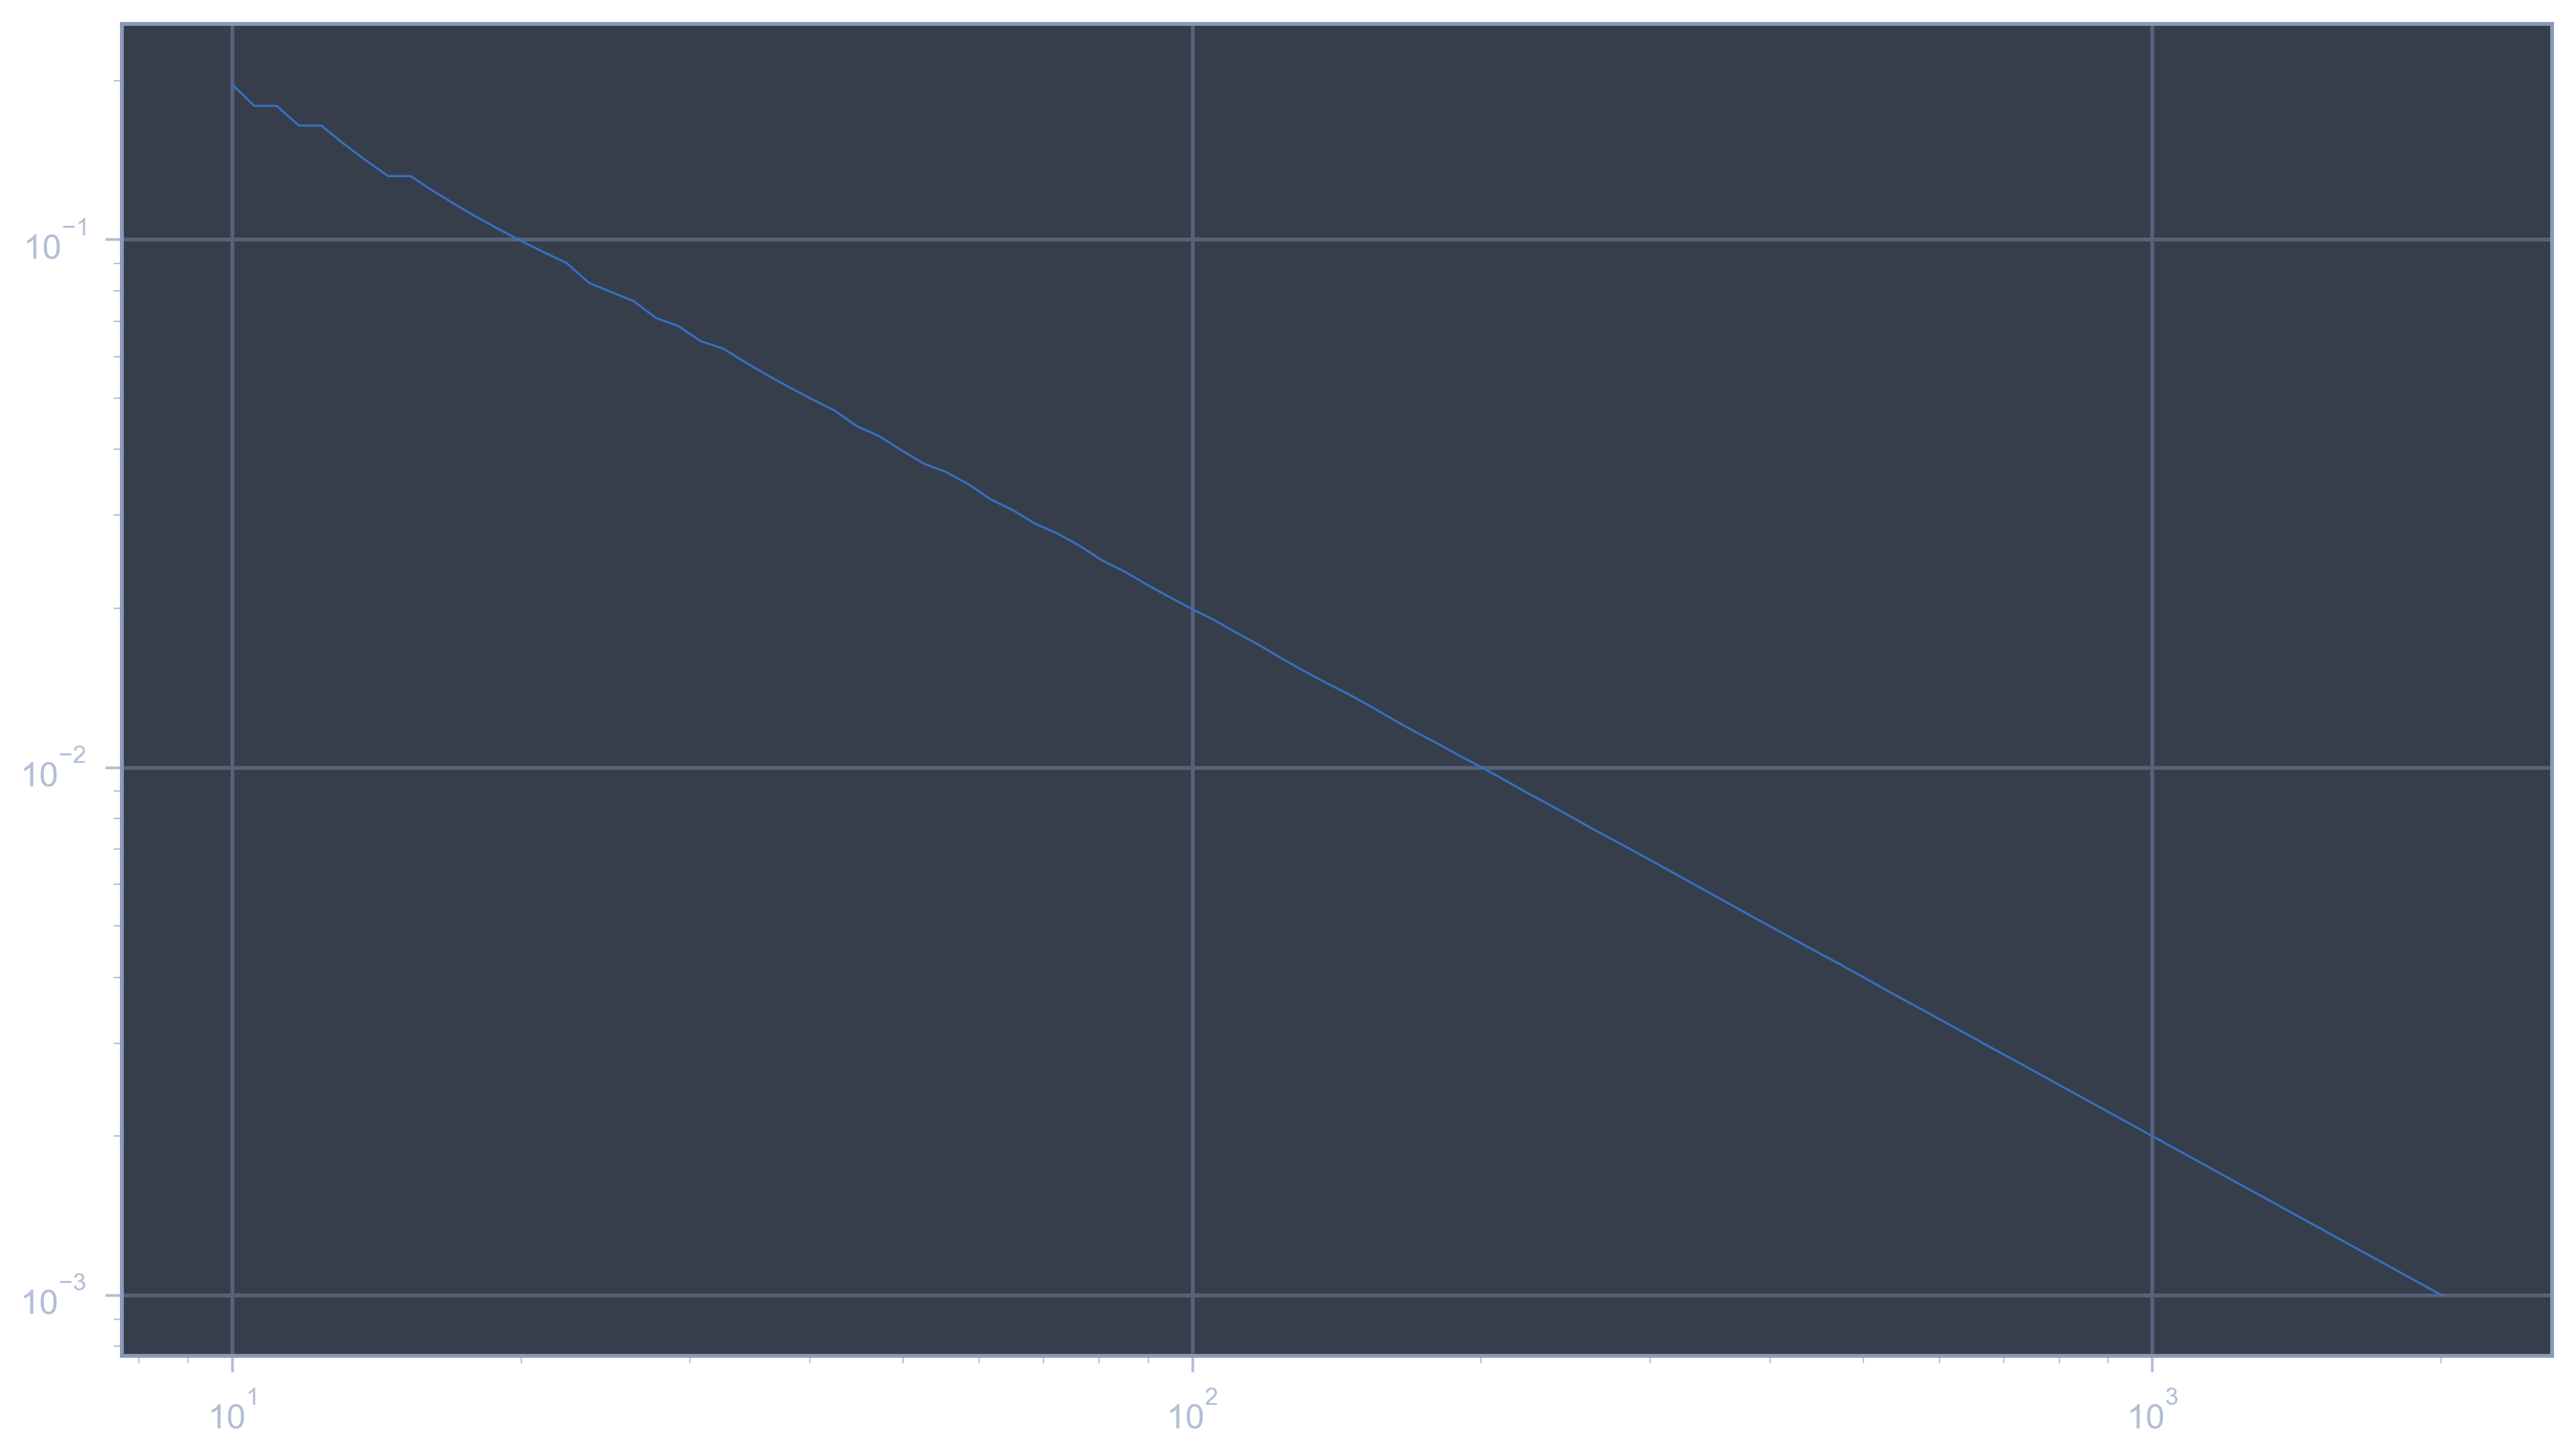

<Figure size 4000x2250 with 0 Axes>

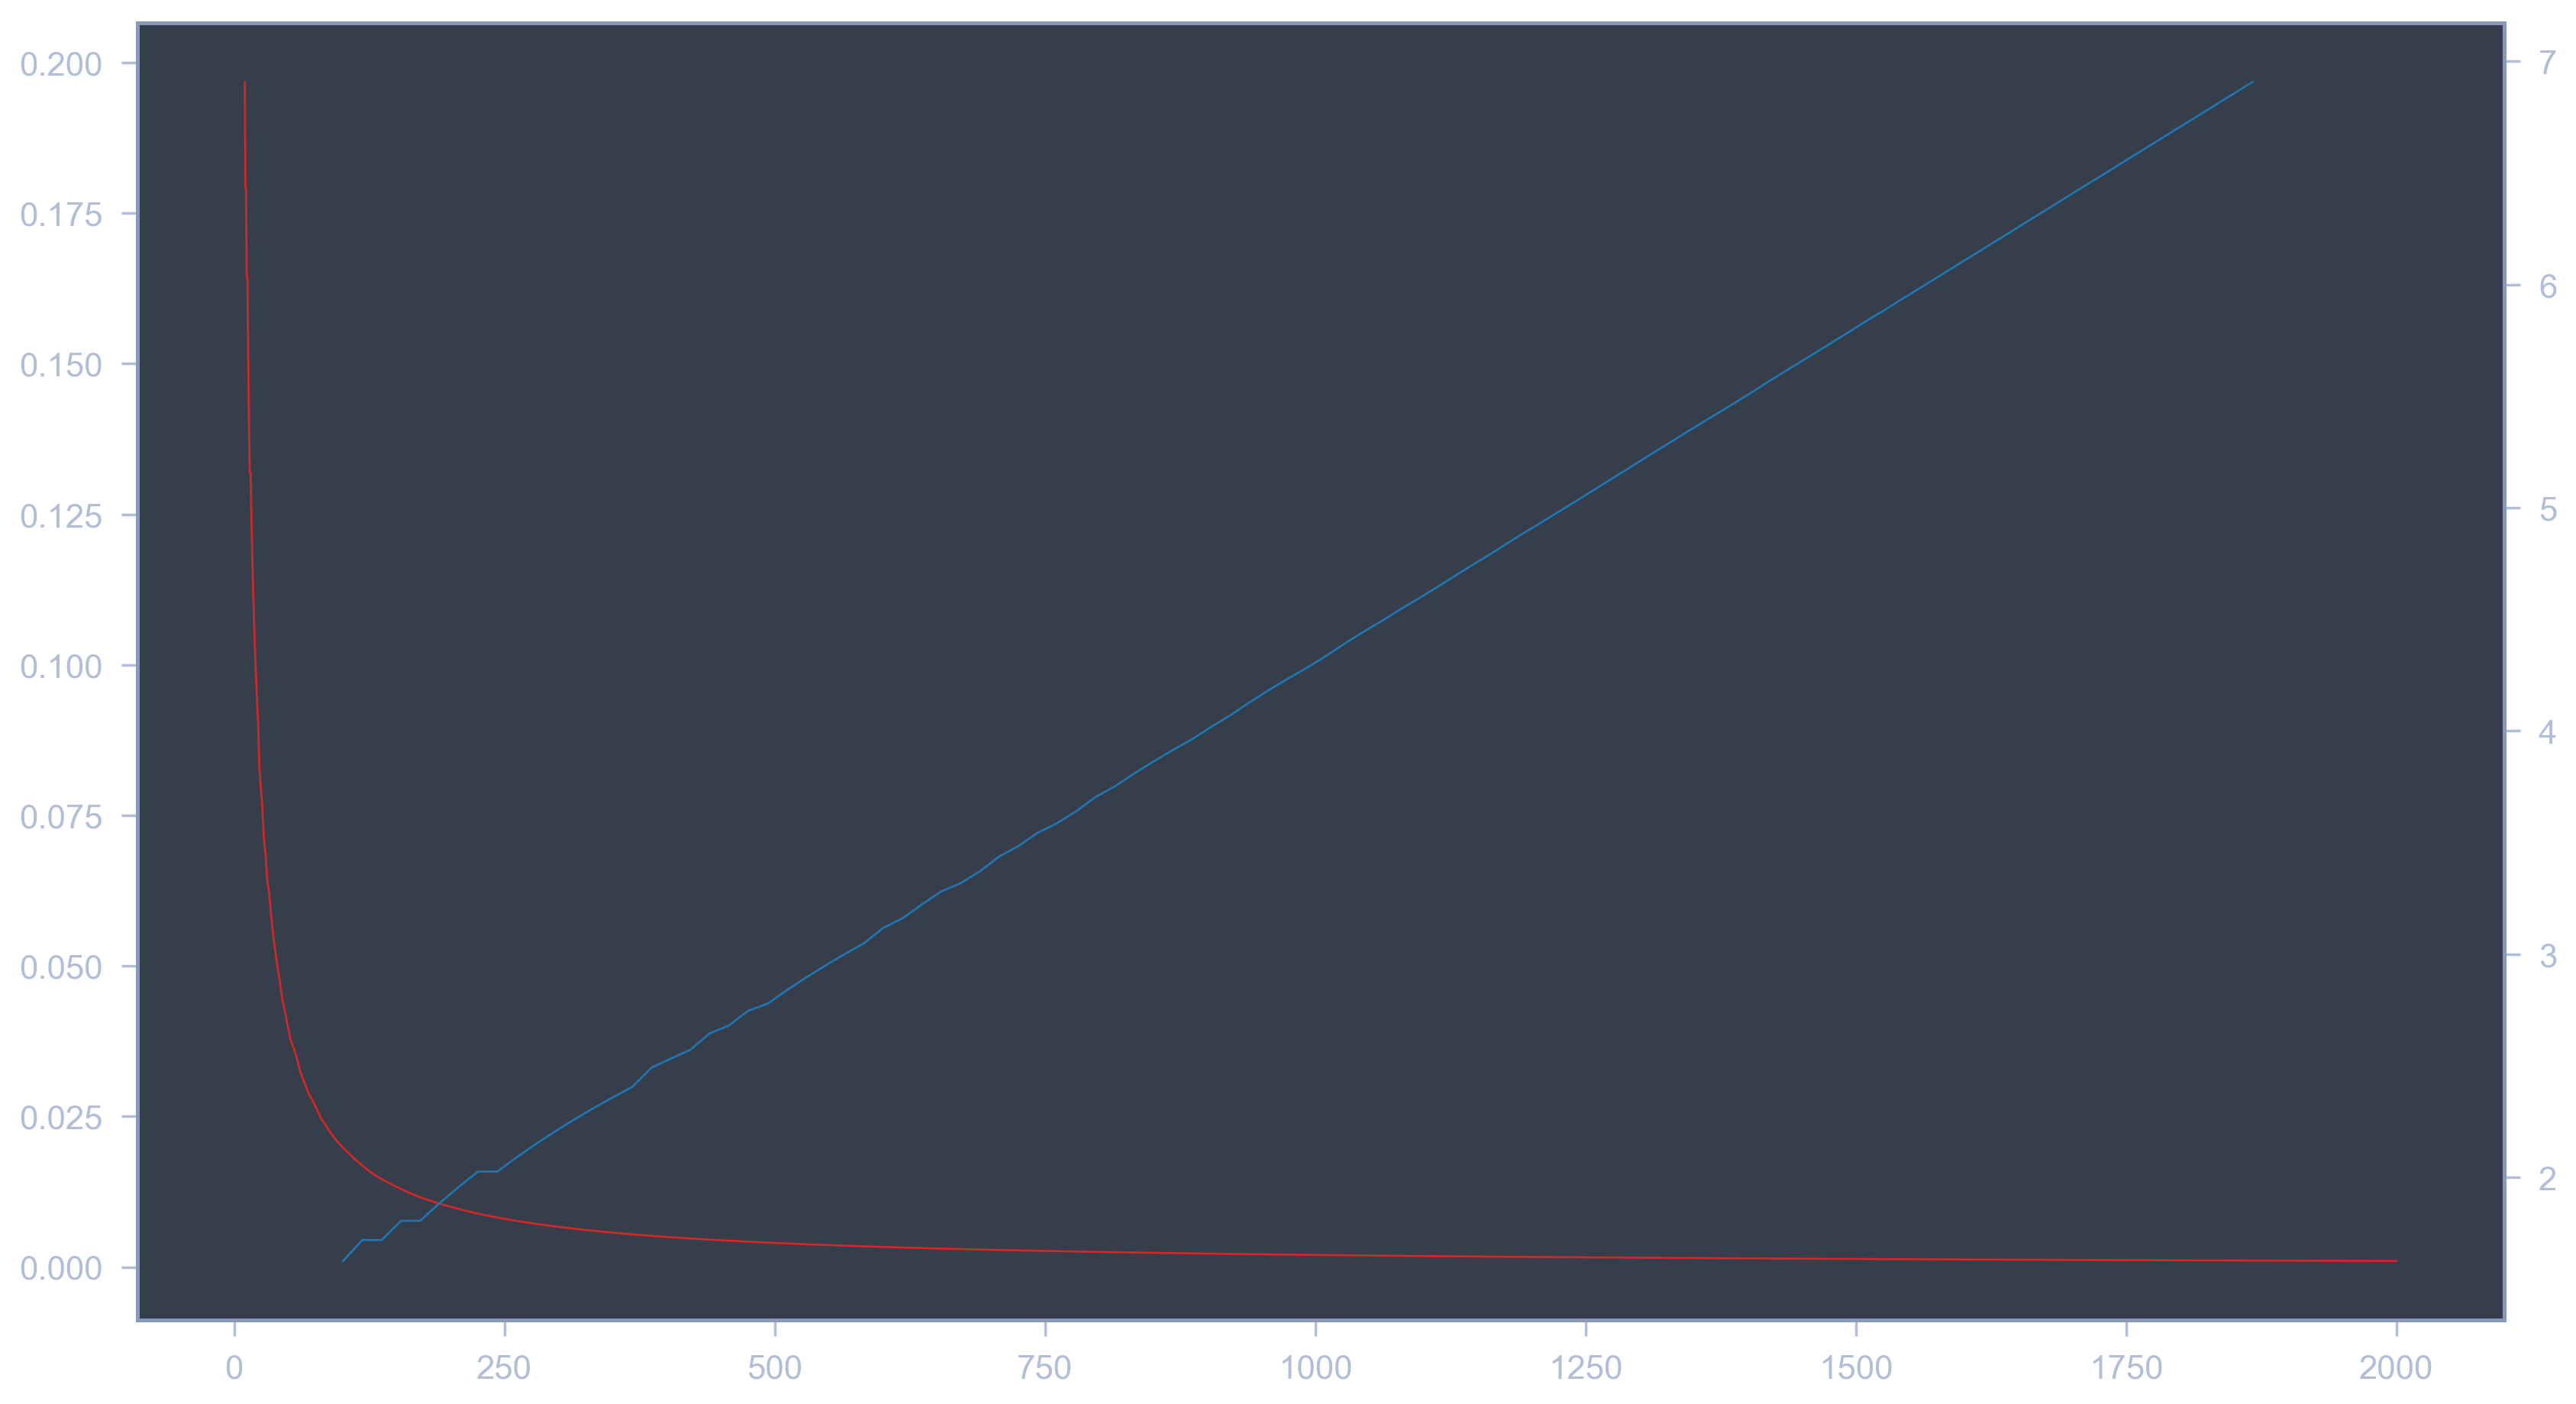

In [111]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def vorwDiffQuot(func, x, i):
    """returns Foreward differential quotient of function func at value x[i]"""
    if i>=x.size-1 or i<0:
        return 0.0
    return (func(x[i+1])-func(x[i]))/(x[i+1]-x[i])

def trapez(func, a, b, N):
    """returns Trapezoidal approximation of Integral of function func between a and b with N steps in between"""
    X= np.linspace(a, b, N+1, dtype=np.float64)
    Dx= (b-a)/(N+1)
    I=0
    for i in range(0,N):
        I+=(func(X[i])+func(X[i+1]))
    return I/2*Dx

def abw(alg, func, a, b, N, realVal):
    """returns the difference of the integration algorithm alg and the analytical value realVal. 
    func, a, b, N: function to be operated upon, start, stop and step of alg. """
    return np.abs(alg(func, a, b, N)-realVal)

#plot the difference between trapez-integral and analytical value, 
#dependant on the height (0-np.pi)/L, on a log-log plot

L= np.geomspace(10,2000,100)
FL= np.empty(100)
for i in range(0,100):
    FL[i]= abw(trapez, f, 0.0, np.pi, np.round(L[i]).astype(np.int64), 2)
plt.loglog(L, FL)
plt.grid()

#get slope of the log-log plot via foreward- differentiating
slope= 0.0
FLl= np.log(FL)*(-1)
Ll=np.log(L)
for i in range(0,99):
    slope+=(FLl[i]-FLl[i+1])/(Ll[i]-Ll[i+1])
print(slope)
print(slope/99)

plt.figure(2)
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(L, FL, color=color)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.plot((Ll-2)*2000/6, FLl, color=color)
ax2.tick_params(axis='y')


1.9982455118994529


"\nplt.figure(2)\nfig, ax1 = plt.subplots()\ncolor = 'tab:red'\nax1.plot(L, FL, color=color)\nax1.tick_params(axis='y')\nax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis\ncolor = 'tab:blue'\nax2.plot((Ll-2)*2000/6, FLl, color=color)\nax2.tick_params(axis='y')\n"

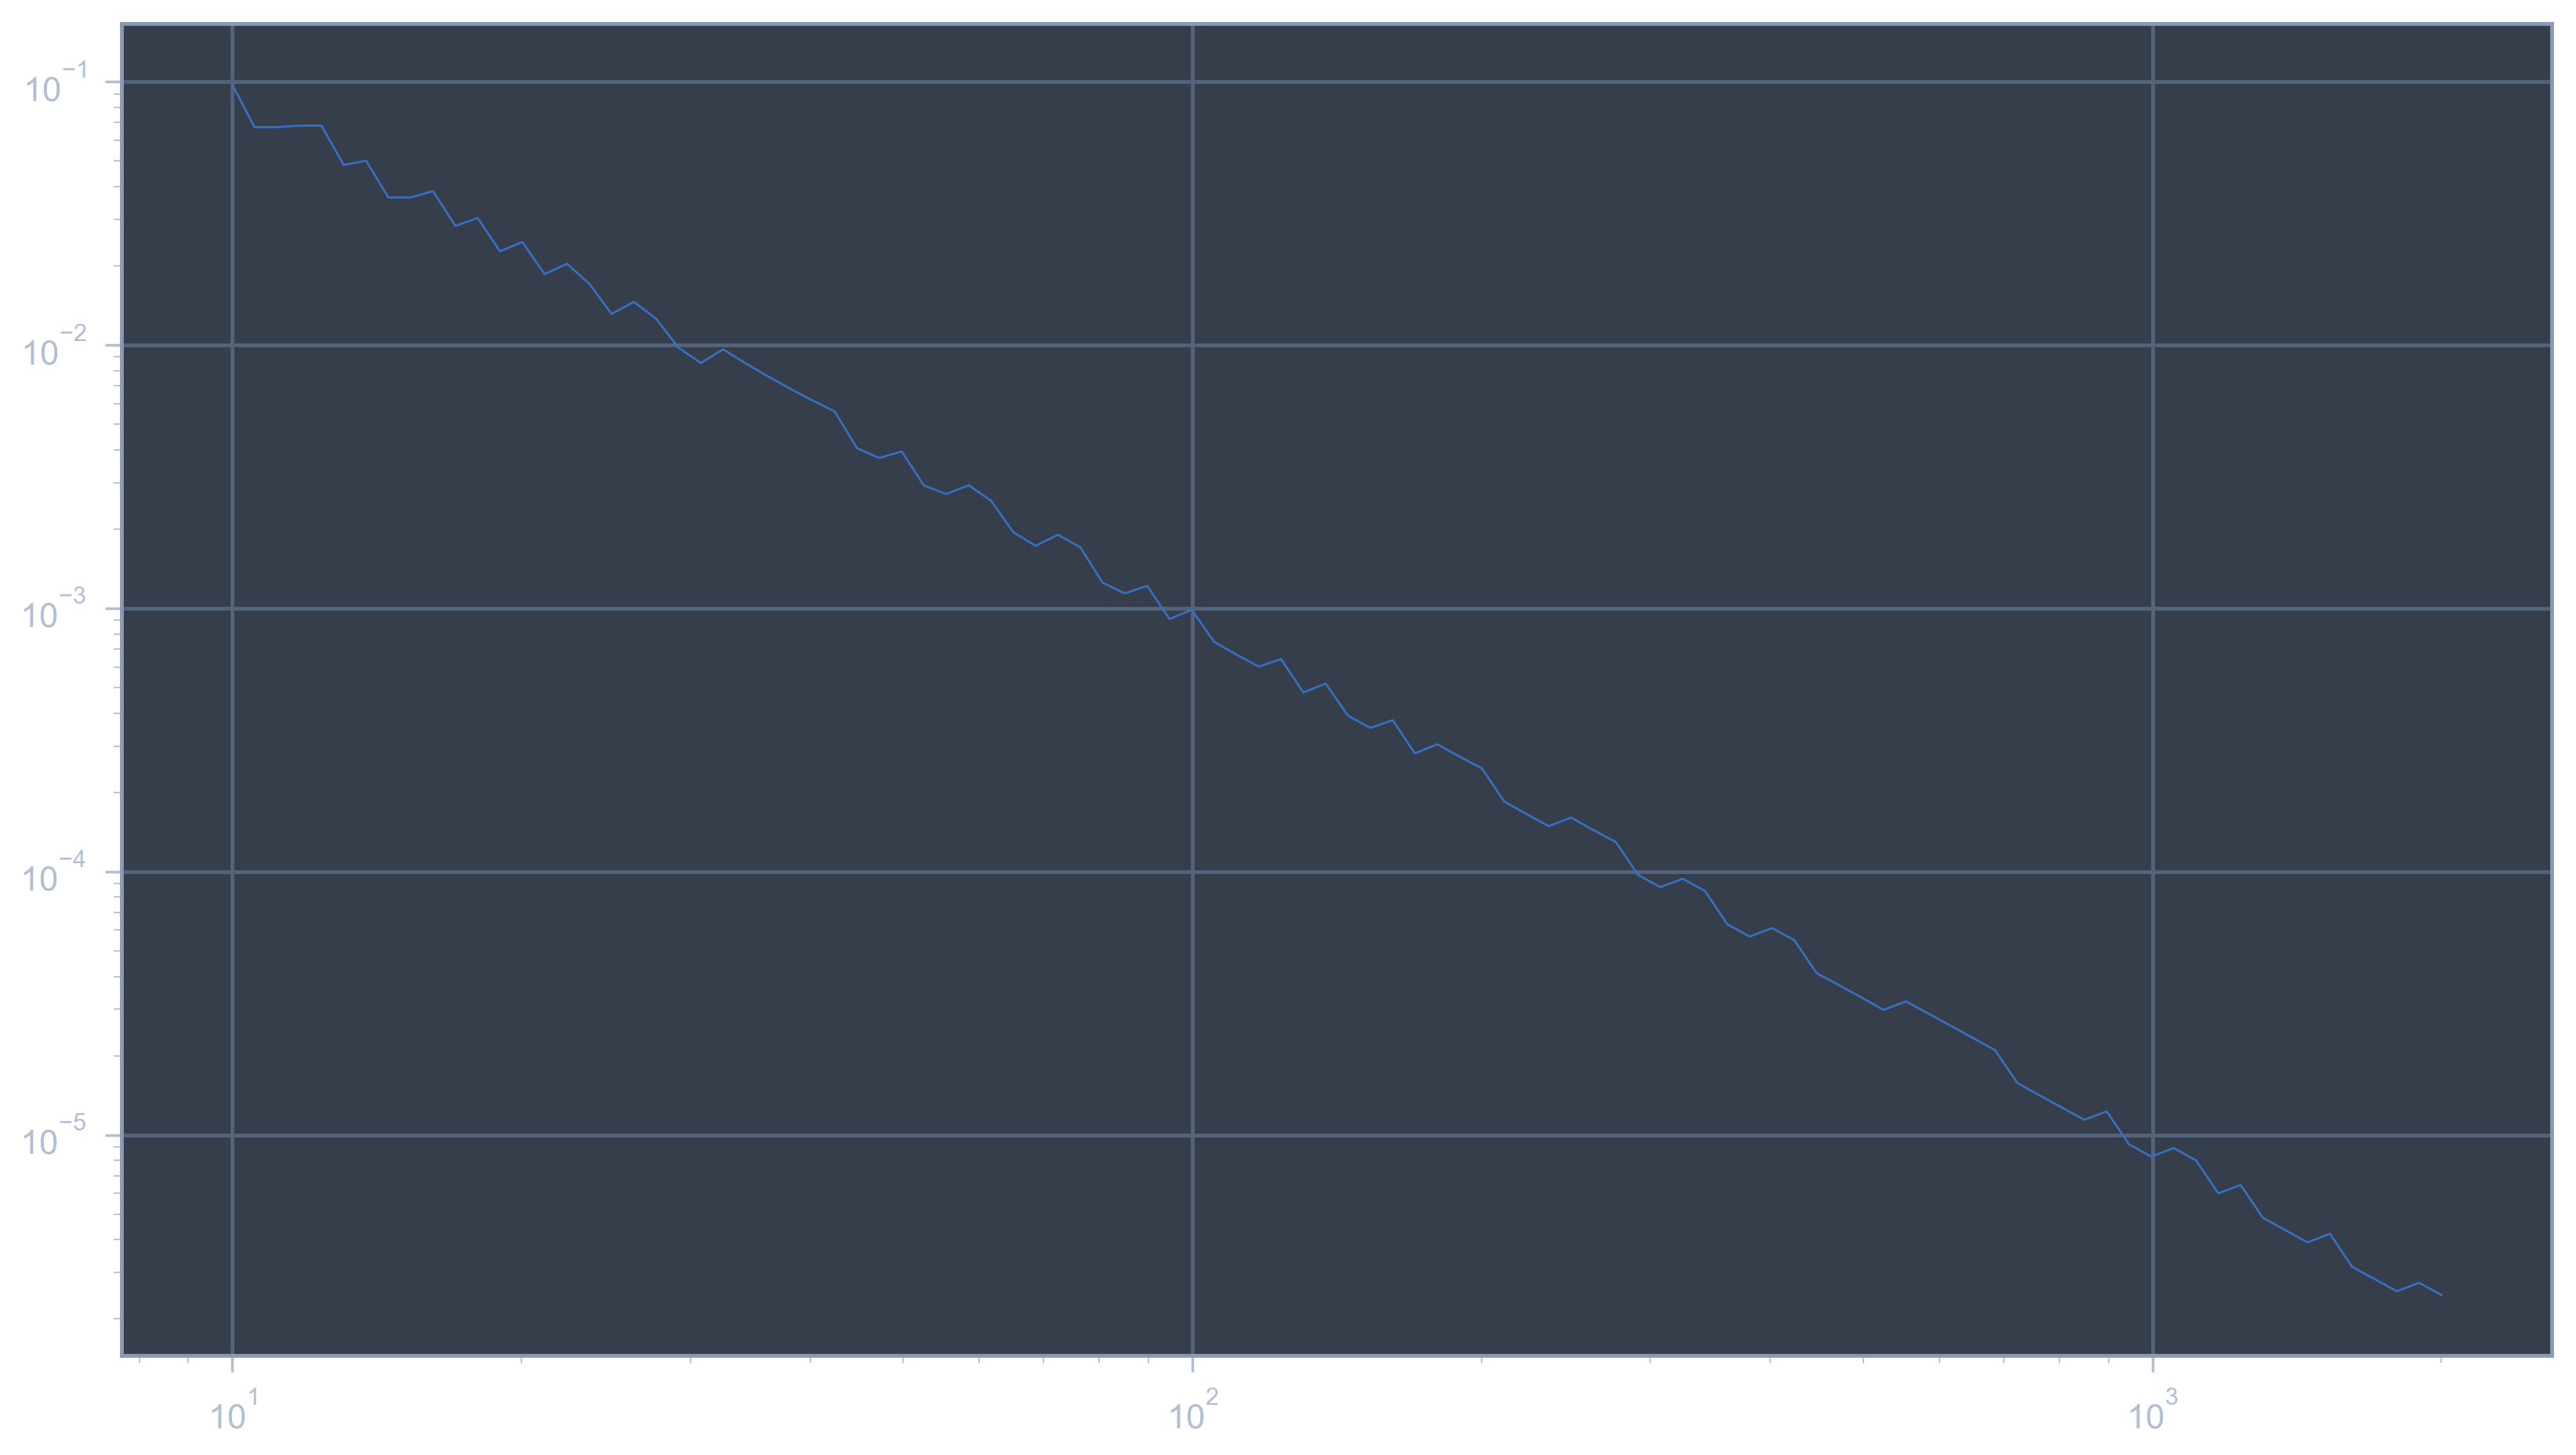

In [113]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def abw(alg, func, a, b, N, realVal):
    """returns the difference of the integration algorithm alg and the analytical value realVal. 
    func, a, b, N: function to be operated upon, start, stop and step of alg. """
    return np.abs(alg(func, a, b, N)-realVal)

def intSimpson(func, a, b, N):
    k1= 0.0
    k2= 0.0
    Dx= (b-a)/N
    for i in range(2,N):
        if i%2==0:
            k1+=func(a+i*Dx)
        else:
            k2+=func(a+i*Dx)
    return Dx*(func(a)+func(b)+4*k1+2*k2)/3

#plot the difference between trapez-integral and analytical value, 
#dependant on the height (0-np.pi)/L, on a log-log plot

L= np.geomspace(10,2000,100)
FL= np.empty(100)
for i in range(0,100):
    FL[i]= abw(intSimpson, f, 0.0, np.pi, np.round(L[i]).astype(np.int64), 2)
plt.loglog(L, FL)
plt.grid()

#get slope of the log-log plot via foreward- differentiating
slope= 0.0
FLl= np.log(FL)*(-1)
Ll=np.log(L)
for i in range(0,99):
    slope+=(FLl[i]-FLl[i+1])/(Ll[i]-Ll[i+1])
print(slope/99)

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def M2f1f2(M):
    f1= np.floor(np.sqrt(M)).astype(np.int64)
    f2= f1
    while f1>0:
        if f1*f2==M: 
            return (f1, f2)
        elif f1*f2>M:
            f1-=1
        else:
            f2+=1
    return 

def PrimZerl(M, array):
    f1, f2= M2f1f2(M)
    if f1==1 or f2==1:
        array.append(M)
    else:
        PrimZerl(f1, array)
        PrimZerl(f2, array)
    return array

MValues= [1500320,87065078,87069473925]
for i in MValues:
    f1, f2= M2f1f2(i)
    print(str(i)+"= "+str(f1)+"*"+str(f2))
k= PrimZerl(870037764750,list())
print(sorted(k))

1500320= 160*9377
87065078= 538*161831
87069473925= 289821*300425
[2, 3, 3, 5, 5, 5, 7, 7, 7, 7, 11, 11, 11, 11, 11]
